# Exemplo regressão linear simples com dataset

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
data = pd.read_csv('water_potability.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [17]:
# excluir linhas com NaN
data = data.dropna()
data.head(25)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0


In [18]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


6.056689854989468
[0.00525239]
O modelo é: y = 6.057 + (0.005)x


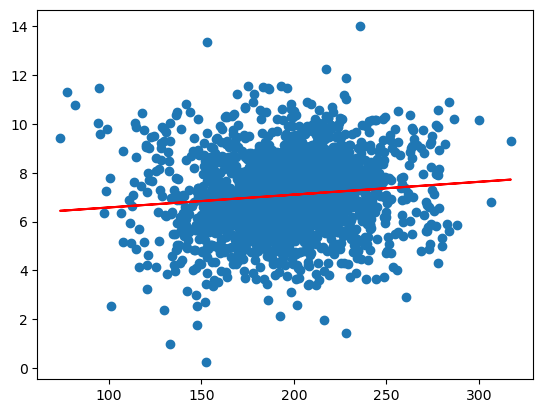

In [19]:
data = data.to_numpy()
y = data[:,0]
x = data[:,1]
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print(modelo.intercept_)
print (modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))

## Exemplo regressão multipla com dataset

In [21]:
y = data[:,3]
x = data[:,0:3]
#X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [22]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)


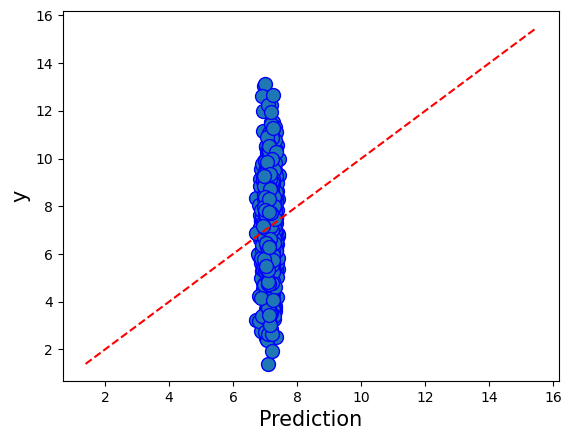

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

In [24]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)


R2: 0.004054738243356559


## Exemplo com OLS estimação

In [8]:
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
# não usar numpy array

In [9]:
data = pd.read_csv('iris.csv', header=(0))
data.head(25)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [10]:
X = data[['sepal.length', 'sepal.length','petal.length']]
y = data[['petal.width']]
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal.width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.60e-85
Time:                        10:36:26   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049      0.961      -0.369       0.351
sepal.length    -0.0411      0.021     -1.992      0.048      -0.082      -0.000
sepal.length    -0.0411      0.021     -1.992      0.048      -0.082      -0.000
petal.length     0.4494      0.019     23.205      0.000       0.411       0.488
==============================================================================
Omnibus:                        6.657   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.663
Skew:                           0.386   Prob(JB):                       0.0357
Kurtosis:                       3.685   Cond. No.                     7.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Escolhendo os atributos para o x

In [11]:
data1 = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(25)

Número de linhas e colunas: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [12]:
data1 = data1.drop(columns=['sepal.width'])
data1.head()

,sepal.length,petal.length,petal.width,variety
0,5.1,1.4,0.2,Setosa
1,4.9,1.4,0.2,Setosa
2,4.7,1.3,0.2,Setosa
3,4.6,1.5,0.2,Setosa
4,5.0,1.4,0.2,Setosa


In [13]:
#data1 = data1.to_numpy()
y = data1.iloc[:,2]
x = data1.iloc[:,0:2]
X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [14]:
# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)

In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.9290248640257687


In [16]:
data1 = pd.read_csv('mtcars.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(25)

Número de linhas e colunas: (32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [17]:
data1 = data1.to_numpy()
y = data1[:,4]
x = data1[:,1:3]
#x = np.array(x).reshape(-1, 1)
y = np.array(y)

In [18]:
# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)

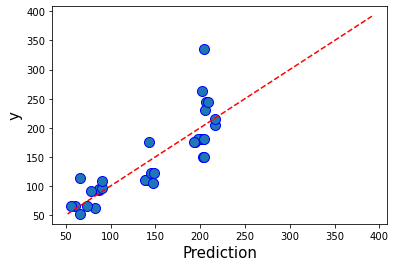

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)



In [20]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.7092593162528988


# Escolhendo x com dataset mtcars

In [21]:
data1 = pd.read_csv('mtcars.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(25)

Número de linhas e colunas: (32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [22]:
X = data1[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear']]
y = data1[['carb']]
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   carb   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     14.55
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           2.60e-07
Time:                        10:36:49   Log-Likelihood:                -27.109
No. Observations:                  32   AIC:                             76.22
Df Residuals:                      21   BIC:                             92.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4681      4.943     -0.499      0.623     -12.747       7.811
mpg           -0.0138      0.057     -0.241      0.812      -0.133       0.105
cyl            0.2854      0.268      1.066      0.299      -0.271       0.842
disp          -0.0143      0.004     -3.987      0.001      -0.022      -0.007
hp             0.0135      0.005      2.667      0.014       0.003       0.024
drat           0.4170      0.423      0.986      0.335      -0.462       1.296
wt             1.5332      0.426      3.597      0.002       0.647       2.420
qsec          -0.2249      0.192     -1.174      0.254      -0.624       0.174
vs            -0.2304      0.551     -0.418      0.680      -1.377       0.916
am            -0.1188      0.559     -0.212      0.834      -1.282       1.044
gear           0.7715      0.357      2.163      0.042       0.030       1.513
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.482
Skew:                          -0.146   Prob(JB):                        0.786
Kurtosis:                       2.474   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Coeficiente de correlação linear de um dataset

<AxesSubplot:>

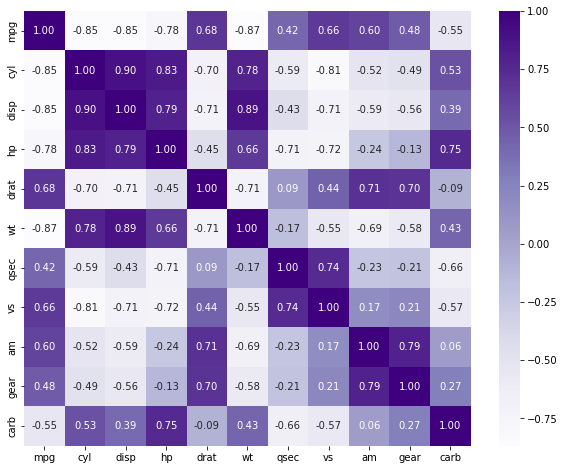

In [23]:
import seaborn as sns
corr = data1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')

# Exercício: Ler o dataset gapminder_2015. Exibir a tabela com os coeficientes de correlção linear completa. Fazer uma regressão linear com y sendo CPI e x sendo LifeExpect e calcular R2. Fazer outra regressão linear com y sendo CPI e x sendo gini_index e calcular o R2. Fazer uma regressão múltipla com y sendo a CPI e x sendo LifeExpect e Happyldx e calcular o R2
    

In [ ]:
# resolução do exercício